# Neural Network Training and Prediction with PyTorch

**Overview:**

This is a command-line application for training and making predictions using a neural network model built with PyTorch. The project consists of four main files:

- **train.py:** Script for training a neural network model.
- **predict.py:** Script for making predictions using a trained model.
- **model_operations.py:** Module containing classes and functions related to the neural network model.
- **utils.py:** Utility functions for data loading and processing.

**Key Features:**

- **GPU Support:** The project is configured to leverage GPU acceleration if available, enhancing the training speed.
- **Checkpoint Saving:** During the training process, the script automatically saves checkpoints, it allows to resume training from the last epoch in case of interruption.
- **Supported Architectures:** The project supports popular architectures like VGG and ResNet, providing flexibility in choosing the architecture that best suits the task.

# Downloading and Setting up Flower Dataset

This code snippet automates the process of downloading and setting up the flower dataset for further analysis.
The dataset is retrieved from a specified URL, and if the dataset directory is not already present, the script creates it, downloads the dataset tarball, extracts the contents, and finally removes the downloaded tarball to save space. Informative messages are printed during each step to provide updates on the progress of the dataset download and setup.


In [1]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


# Train Neural Network Model

This script facilitates the training of a neural network model on a specified dataset. It supports various configuration options to customize the training process.

### How to Run:

1. **Upload Dataset:** Ensure that you have the dataset prepared and uploaded to the Colab environment. The `data_dir` argument should point to the root directory of the dataset, containing 'train' and 'valid' subdirectories.

2. **Configure Training:** Modify the optional arguments as needed. For example:
    - **Requiered Arguments:**
   - `--save_dir`: Specify the path to save the trained model checkpoint.

   - **Optional Arguments:**

    - `--arch`: Choose the architecture (default is 'vgg16').
    - `--learning_rate`: Set the learning rate for the optimizer (default is 0.001).
    - `--hidden_units`: Define the number of hidden units in the classifier (default is None).
    - `--epochs`: Set the number of training epochs (default is 5).
    - `--batch_size`: Specify the batch size for training (default is 16).
    - `--gpu`: Enable GPU acceleration if available.
    - `--resume_training`: Resume training from a saved checkpoint.

3. **Run the Script:** Execute the script by providing the required and optional arguments:
   ```bash
   !python3 train.py <data_dir> --save_dir <save_dir> --arch <arch> --learning_rate <learning_rate> --hidden_units <hidden_units> --epochs <epochs> --batch_size <batch_size> --gpu --resume_training

4. **Example:**
```bash
!python3 train.py flowers --arch vgg19 --learning_rate 0.0001 --hidden_units 512 --epochs 10 --batch_size 32 --gpu


In [5]:
!python3 train.py flowers --gpu --learning_rate 0.00001 --arch vgg19 --epochs 20 --resume_training

Using cuda device
Initializing model...
Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=102, bias=True)
  (7): LogSoftmax(dim=1)
)
Training...
Resuming training from epoch 6

epoch No. 6
Epoch 6/20 .. Train loss: 2.502 .. Test loss: 1.561 .. Test accuracy: 0.582
Epoch 6/20 .. Train loss: 2.487 .. Test loss: 1.557 .. Test accuracy: 0.585
Epoch 6/20 .. Train loss: 2.394 .. Test loss: 1.514 .. Test accuracy: 0.613
Epoch 6/20 .. Train loss: 2.334 .. Test loss: 1.511 .. Test accuracy: 0.594
Epoch 6/20 .. Train loss: 2.396 .. Test loss: 1.446 .. Test accuracy: 0.632
Epoch 6/20 .. Train loss: 2.473 .. Test loss: 1.404 .. Test accuracy: 0.633
Epoch 6/20 .. Train loss: 2.387 .. Test loss: 1.377 .. Test accuracy: 0.626
Epoch 6/20 .. Train loss: 2.326 .. Test loss:

# Predict Image Class and Probability

This script allows you to predict the most likely image class and its associated probability using a pre-trained neural network model. It supports customization through various command-line arguments.

### How to Run:

1. **Upload Image and Model:**
   - Ensure you have the image file ready for prediction.
   - If you have a pre-trained model checkpoint, make sure to upload it or use the default checkpoint.

2. **Configure Prediction:**
 - **Required Arguments:**
    - Provide the path to the dataset directory using the `data_dir` argument.
    - Specify the path of the image file using the `image` argument.
 - **Optional Agruments:**
    - Optionally, use the `--checkpoint` argument to provide the path of the model checkpoint (default is "checkpoint.pth").
    - Customize the number of top classes to display with the `--top_k` argument (default is 5).
    - Enable GPU acceleration by using the `--gpu` flag.

3. **Run the Script:**
   ```bash
   !python3 predict.py <data_dir> <image_path> --checkpoint <checkpoint_path> --top_k <top_k> --gpu
   ```

4. **Example:**
```bash
!python3 predict.py flowers image.jpg --checkpoint checkpoint.pth --top_k 3 --gpu
```

### Output:
- The script generates two output files:
  - `output_imshow.png`: Visualization of the predicted class.
  - `output_barh.png`: Bar chart showing the top predicted classes and their probabilities.

**Note:** Ensure that the necessary files, including the image and model checkpoint, are available before running the script.

Using cuda device
Loading model...
Architecture name in checkpoint: vgg19
Figure(640x480)
Figure(640x480)


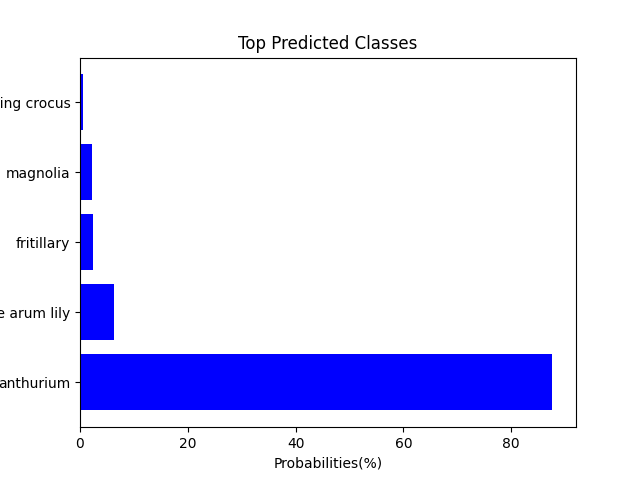

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

!python3 predict.py flowers /content/flowers/test/80/image_02020.jpg --gpu

from IPython.display import Image
Image('output_barh.png')

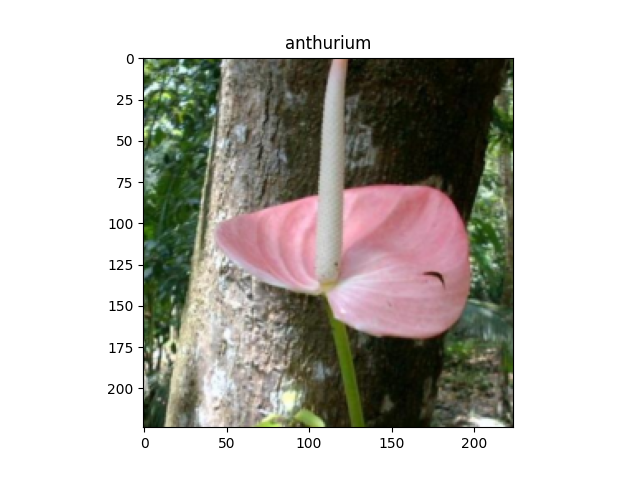

In [16]:
Image('output_imshow.png')